### imports

In [345]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly
import plotly.graph_objs as go
from plotly.offline import *
import seaborn as sb
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer 
import seaborn as sns
import matplotlib.colors
from PIL import Image
from collections import Counter
import plotly.express as px
import warnings
import missingno
from collections import Counter
from plotly.subplots import make_subplots
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import time 
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import davies_bouldin_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

import warnings
warnings.filterwarnings("ignore")

# Data Collection and Preparation 

In [346]:
file_path = "/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv"
df = pd.read_csv(file_path)
my_df=df
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [347]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [348]:
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,9668,9668,9668,7586,8435,672,155,9668.000000,9331,9668,9668,9668
unique,9668,2,9668,5774,7927,86,84,NaN,24,219,518,9414
top,s1,Movie,The Grand Seduction,Mark Knight,Maggie Binkley,United States,"March 30, 2021",NaN,13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,14,NaN,2117,1342,986,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.341849,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.922482,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [350]:
df.shape

(9668, 12)

In [351]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [352]:
df.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [353]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [354]:
df.nunique()

show_id         9668
type               2
title           9668
director        5774
cast            7927
country           86
date_added        84
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64

## Data preparations

### Finding the null values :

In [355]:
for i in range(len(my_df.isnull().sum())):
    if my_df.isnull().sum()[i] > 0:
        print('Total Number of missing values in ' + my_df.isnull().sum().index[i] + ' : ',my_df.isnull().sum()[i])

Total Number of missing values in director :  2082
Total Number of missing values in cast :  1233
Total Number of missing values in country :  8996
Total Number of missing values in date_added :  9513
Total Number of missing values in rating :  337


#### handling missing values

In [356]:
my_df.drop(['duration','date_added'], axis=1 ,inplace=True)

In [357]:
my_df['director'] = my_df['director'].fillna('UnKnown')
my_df['country'] = my_df['country'].fillna('UnKnown')
my_df['cast'] = my_df['cast'].fillna('UnKnown')

### Replace the Corresponding Ratings in the 'rating' Column

In [358]:
rating_replacements = {5989: 'TV-PG', 6827: 'TV-14', 7312: 'PG', 7537: 'PG-13'}
for index, rating in rating_replacements.items():
    my_df.loc[index, 'rating'] = rating
    
my_df['rating'].isnull().any()

True

In [359]:
my_df['rating'] = my_df['rating'].replace({'74 min': 'TV-MA', '84 min': 'TV-MA', '66 min': 'TV-MA'})
my_df['rating'] = my_df['rating'].replace({'TV-Y7-FV': 'TV-Y7'})

In [360]:
my_df.isna().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
release_year      0
rating          337
listed_in         0
description       0
dtype: int64

#### checking the duplicate values

In [361]:
my_df.duplicated().sum()

0

# Data Exploration and Analysis: EDA

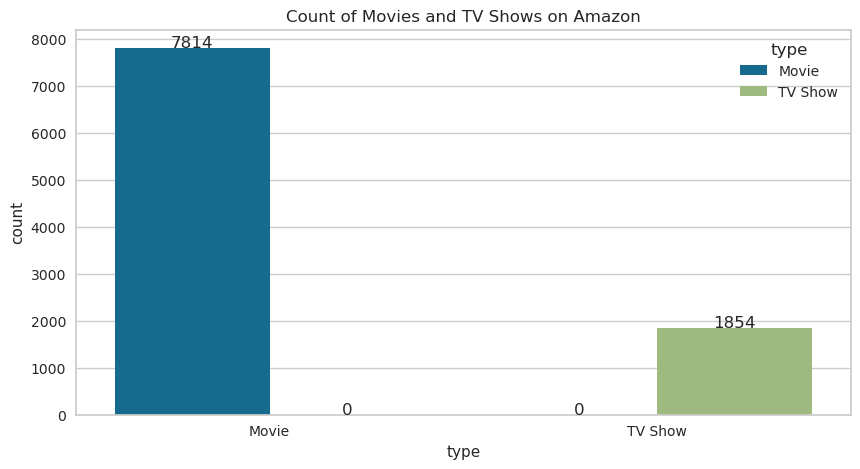

In [362]:
ax=sns.countplot(x='type', hue='type', data = df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, '{:.0f}'.format(height), ha="center")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Count of Movies and TV Shows on Amazon')
plt.savefig('Count of Movies and TV Shows on Amazon.png')


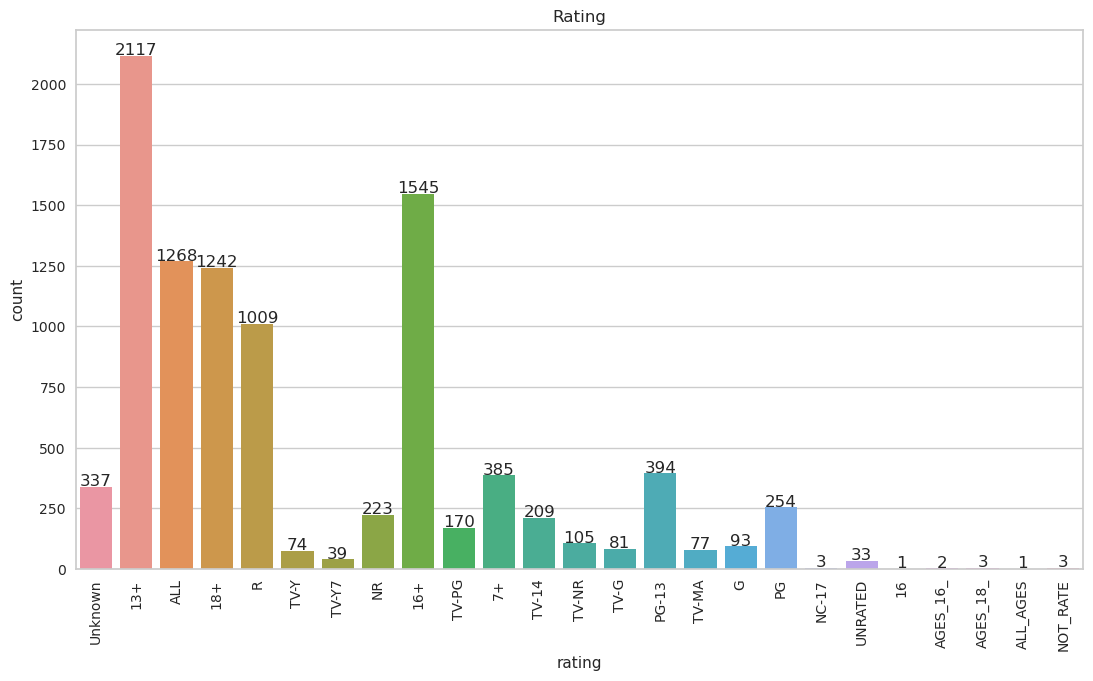

In [363]:
df['rating'].fillna('Unknown', inplace=True)

# Plot countplot and rotate x-axis labels
ax = sns.countplot(x='rating', data = df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, '{:.0f}'.format(height), ha="center")
    
plt.xticks(rotation=90)

# Set figure size and title
fig = plt.gcf()
fig.set_size_inches(13,7)
plt.title('Rating')
plt.savefig("Rating.png")

### Relation Between Type and Rating

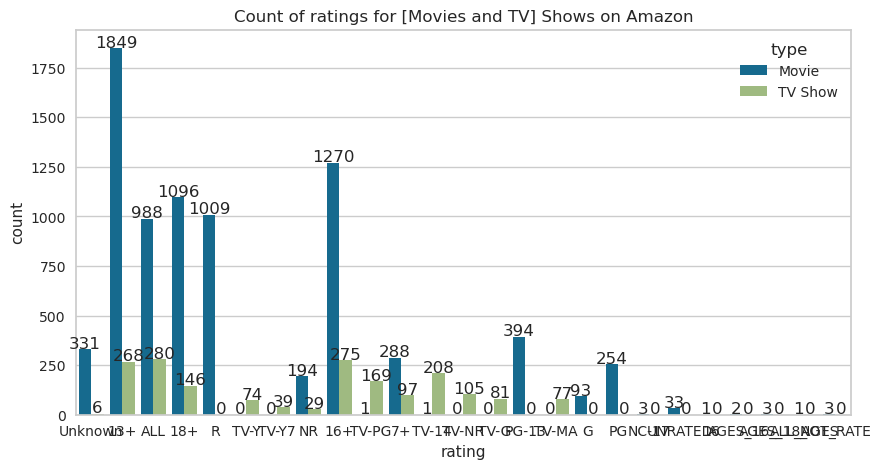

In [364]:
ax=sns.countplot(x='rating', hue='type', data = df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, '{:.0f}'.format(height), ha="center")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Count of ratings for [Movies and TV] Shows on Amazon')
plt.savefig("Count of ratings for [Movies and TV] Shows on Amazon.png")

### pie chart


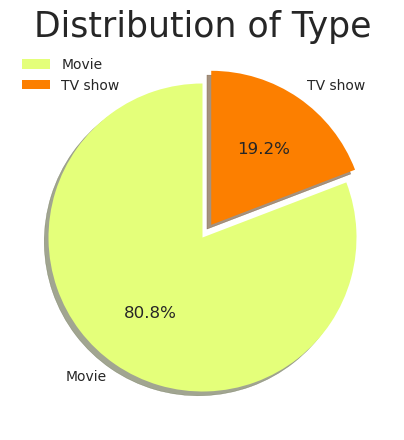

<Figure size 500x500 with 0 Axes>

In [365]:
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (5, 5)
ax = plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Type', fontsize=25)
plt.legend()
plt.show()
plt.savefig("Distribution of Type.png")

### pie chart for rating

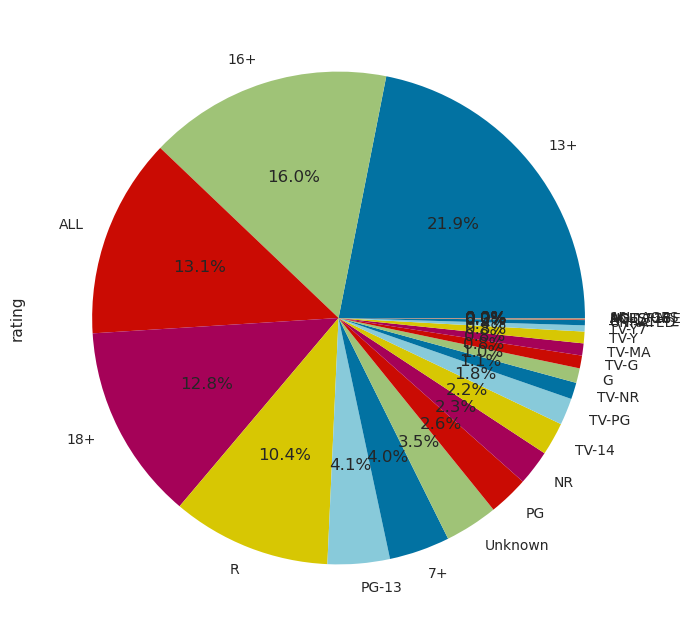

<Figure size 500x500 with 0 Axes>

In [366]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,figsize=(10,8))
plt.show()
plt.savefig("rating-piechart.png")

### Top countries with highest number of rating

In [367]:
my_df_plot = my_df.copy()

mydf_country = my_df_plot['country'].value_counts().reset_index()[:15]
mydf_country = mydf_country[mydf_country['index'] != 'UnKnown']

trace1 = go.Bar(
                x = mydf_country['index'],
                y = mydf_country['country'],
                marker = dict(color = 'rgb(243,212,105)',
                              line=dict(color='rgb(243,212,105)',width=1.5)))

layout = go.Layout(template= "plotly_white",title = 'TOP COUNTERIES WITH THE HIGHT NUMBER OF CONTENT' ,
                   xaxis = dict(title = 'Countries'), yaxis = dict(title = 'Count'))

fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### Genre Correlation

There are 30 types in the Amazon Prime Movie Dataset


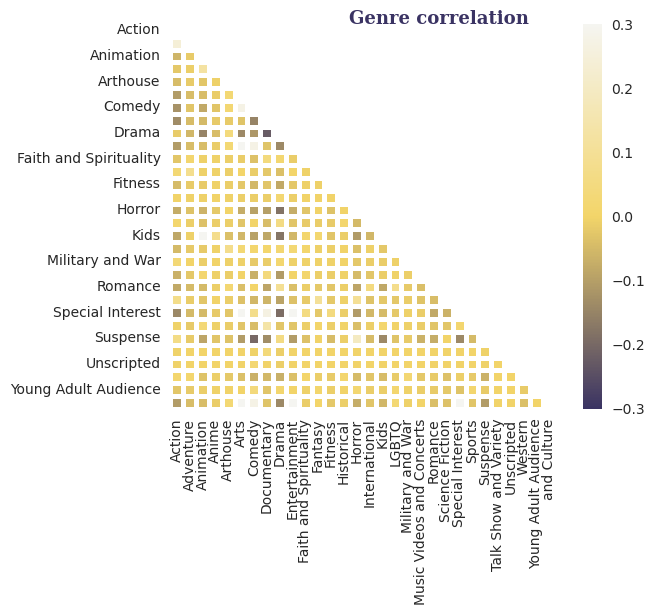

In [368]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#3A3363', '#F3D569','#f5f5f1'])



def genre_heatmap(my_df, title):
    my_df['genre'] = my_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in my_df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Amazon Prime {} Dataset".format(len(Types),title))    
    test = my_df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(7, 5))
    fig.text(.45,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=13, color='#3A3363')

    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()
    
df_tv = my_df[my_df["type"] == "TV Show"]
df_movies = my_df[my_df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

### in which year highest number of TV shows and movies released

In [369]:
df['release_year'].value_counts()

2021    1442
2020     962
2019     929
2018     623
2017     562
        ... 
1922       2
1926       2
1924       1
1923       1
1927       1
Name: release_year, Length: 100, dtype: int64

### Show Top 3 Director who gave the highest numbber of movie and TV shows released on prime

In [370]:
df['director'].value_counts().head(3)

UnKnown          2082
Mark Knight       113
Cannis Holder      61
Name: director, dtype: int64

<AxesSubplot:>

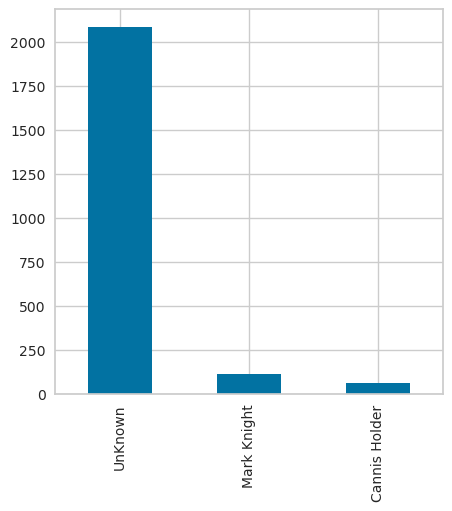

In [371]:
df['director'].value_counts().head(3).plot(kind='bar')

# Feature Engineering


### Renaming the 'rating' Column's Values for Easy Understanding:

In [373]:
my_df['rating'] = my_df['rating'].replace({
                                            'TV-MA': 'Adults',
                                            'R': 'Adults',
                                            'TV-Y': 'Kids',
                                            'TV-G': 'Kids',
                                            'G': 'Kids',
                                            'PG-13': 'Teens - Age above 12',
                                            'PG': 'Kids - with parental guidence',
                                            'TV-PG': 'Kids - with parental guidence',
                                            'TV-14': 'Teens - Age above 14',
                                            'TV-Y7': 'Kids - Age above 7',
                                            'NC-17': 'Adults',
                                            'UR' : 'UR',
                                            'NR': 'NR'
                                          })

my_df['rating'].unique()

array(['Unknown', '13+', 'ALL', '18+', 'Adults', 'Kids',
       'Kids - Age above 7', 'NR', '16+', 'Kids - with parental guidence',
       '7+', 'Teens - Age above 14', 'TV-NR', 'Teens - Age above 12',
       'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES', 'NOT_RATE'],
      dtype=object)

In [374]:
mydf_type = my_df.groupby('type')['show_id'].count().reset_index()
mydf_type = mydf_type.rename(columns = {"show_id":"count_showids"})
mydf_type

,type,count_showids
0,Movie,7814
1,TV Show,1854


In [375]:
my_df_new = my_df.copy()

bag_of_words_data = ['director', 'cast', 'listed_in','description']

for col in bag_of_words_data:
    my_df_new[col] = my_df_new[col].astype(str).map(lambda x : x.lower().replace(' ', '').split(',')[:3])

my_df_new['bag_of_words'] = ''

for i, row in my_df_new.iterrows():
    words = [' '.join(row[col]) for col in bag_of_words_data]
    my_df_new.loc[i, 'bag_of_words'] = ' '.join(words)

my_df_new.head()

,show_id,type,title,director,cast,country,release_year,rating,listed_in,description,bag_of_words
0,s1,Movie,The Grand Seduction,[donmckellar],"[brendangleeson, taylorkitsch, gordonpinsent]",Canada,2014,Unknown,"[comedy, drama]",[asmallfishingvillagemustprocurealocaldoctorto...,donmckellar brendangleeson taylorkitsch gordon...
1,s2,Movie,Take Care Good Night,[girishjoshi],"[maheshmanjrekar, abhaymahajan, sachinkhedekar]",India,2018,13+,"[drama, international]",[ametrofamilydecidestofightacybercriminalthrea...,girishjoshi maheshmanjrekar abhaymahajan sachi...
2,s3,Movie,Secrets of Deception,[joshwebber],"[tomsizemore, lorenzolamas, robertlasardo]",United States,2017,Unknown,"[action, drama, suspense]",[afteramandiscovershiswifeischeatingonhimwitha...,joshwebber tomsizemore lorenzolamas robertlasa...
3,s4,Movie,Pink: Staying True,[soniaanderson],"[interviewswith:pink, adele, beyoncé]",United States,2014,Unknown,[documentary],"[pinkbreaksthemoldonceagain, bringinghercareer...",soniaanderson interviewswith:pink adele beyonc...
4,s5,Movie,Monster Maker,[gilesfoster],"[harrydeanstanton, kierano'brien, georgecostigan]",United Kingdom,1989,Unknown,"[drama, fantasy]",[teenagemattbantingwantstoworkwithafamousbutec...,gilesfoster harrydeanstanton kierano'brien geo...


**CountVectorizer** will used to convert a collection of text documents into a matrix of word counts.

In [376]:
vectorizer = CountVectorizer(max_df=0.4,        
                             min_df=1,     
                             stop_words='english',
                             lowercase=True, 
                             ngram_range=(1,3)
                            )

count_matrix = vectorizer.fit_transform(my_df_new['bag_of_words'])

# Model Selection: 

#### <li style="list-style:disc;">K-Means Clustering</li>
####  <li style="list-style:disc;">KNN</li>
####  <li style="list-style:disc;">Decision Tree</li>
####  <li style="list-style:disc;">Logistic Regression</li>
####  <li style="list-style:disc;">Naive Bayes</li>

# Model Training and Evaluation: 

#  <li style="list-style:disc;">K-Means Clustering</li>

In [377]:
k = 200

kmeans = MiniBatchKMeans(n_clusters = k)

kmeans.fit(count_matrix)

centers = kmeans.cluster_centers_.argsort()[:,::-1]

terms = vectorizer.get_feature_names_out()

request_transform = vectorizer.transform(my_df_new['bag_of_words'])

my_df_new['cluster'] = kmeans.predict(request_transform) 

my_df_new['cluster'].value_counts().head()

163    6916
107    1585
76      423
57      332
146     183
Name: cluster, dtype: int64

In [378]:
def find_similar(CountVectorizer_matrix, index, top_n = 10):
    cosine_similarities = linear_kernel(CountVectorizer_matrix[index:index+1], CountVectorizer_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]  

In [379]:
G = nx.Graph(label="MOVIE")

start_time = time.time()

for i, rowi in my_df_new.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    G.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])

    for element in rowi['cast']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['listed_in']:
        G.add_node(element,label="CATEGORY")
        G.add_edge(rowi['title'], element, label="CATEGORY_IN")
    for element in rowi['director']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['country']:
        G.add_node(element,label="COUNTRY")
        G.add_edge(rowi['title'], element, label="COUNTERY_IN")
    
    indices = find_similar(count_matrix, i, top_n = 10)
    snode="Sim("+rowi['title'][:15].strip()+")" 
    
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['title'], snode, label="SIMILARITY")
    
    for element in indices:
        G.add_edge(snode, my_df_new['title'].loc[element], label="SIMILARITY")
        
print(" finish -- {} seconds --".format(time.time() - start_time))   

 iter 0 -- 0.008995532989501953 seconds --
 iter 1000 -- 11.85425591468811 seconds --
 iter 2000 -- 23.712159395217896 seconds --
 iter 3000 -- 35.77933621406555 seconds --
 iter 4000 -- 47.91716718673706 seconds --
 iter 5000 -- 59.621713399887085 seconds --
 iter 6000 -- 71.31056547164917 seconds --
 iter 7000 -- 83.0878553390503 seconds --
 iter 8000 -- 94.7514009475708 seconds --
 iter 9000 -- 106.36173248291016 seconds --
 finish -- 114.07912397384644 seconds --


In [380]:
def get_recommendation(root):
    commons_neighbours = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_neighbours.get(e2)
                if commons==None:
                    commons_neighbours.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_neighbours.update({e2 : commons})
    
    movies=[]
    weight=[]
    
    for key, values in commons_neighbours.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key) 
        weight.append(w)
    
    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)        
    return result;

result = get_recommendation("Monster Maker")
print("-"*40+"\n Recommendation for 'Monster Maker'\n"+"-"*40)
print(result.head())

----------------------------------------
 Recommendation for 'Monster Maker'
----------------------------------------
Good Omens               2.482173
Tubelight                2.242617
Cinderella               1.943120
Beowulf                  1.943120
Living With Dinosaurs    1.943120
dtype: float64


#### Evaluting parameter for clustering algorithms

In [381]:
db_index = davies_bouldin_score(count_matrix.toarray(), kmeans.labels_)

print("The Davies-Bouldin index is: {:.3f}".format(db_index))

The Davies-Bouldin index is: 1.205


#  <li style="list-style:disc;">KNN</li>

In [382]:
features_knn = ['type', 'country','release_year','rating','title']
my_df_knn = my_df[features_knn]

In [383]:
my_df_knn = pd.get_dummies(my_df_knn, columns=['type', 'rating', 'country'])

my_df_knn.reset_index(drop=True, inplace=True)

In [384]:
similarities = cosine_similarity(count_matrix, count_matrix)

dissimilarities = 1 - similarities

In [385]:
def euclidean_distance(record1, record2, release_year_weighting=0.1):
    record1_features = np.array([record1[col] for col in my_df_knn.columns if col != 'title' and col != 'bag_of_words' and col != 'release_year'])
    record1_features = record1_features.astype(np.int16)
    record2_features = np.array([record2[col] for col in my_df_knn.columns if col != 'title' and col != 'bag_of_words' and col != 'release_year'])
    record2_features = record2_features.astype(np.int16)
    diffs = np.subtract(record1_features, record2_features)

    diff_release_year = release_year_weighting * (record1['release_year'] - record2['release_year'])
    diffs = np.append(diffs, [diff_release_year])

    return math.sqrt(np.sum([diff ** 2 for diff in diffs]))

In [386]:
def total_distance(record1_index, record2_index, bag_of_words_weighting=2):
    record1 = my_df_knn.iloc[record1_index]
    record2 = my_df_knn.iloc[record2_index]
    distance = euclidean_distance(record1, record2)
    distance += bag_of_words_weighting * dissimilarities[record1_index][record2_index]
    return distance

In [387]:
def get_recommendation_knn(title, top=5):
    all_titles = my_df_knn['title']
    title_instances = all_titles[all_titles == title]
    
    if title_instances.empty:
        print("Sorry! There isn't that movie in our databese")
        return
    
    curr_index = all_titles[all_titles == title].index[0]

    distances = list()
    
    for i, row in my_df_knn.iterrows():
        distances.append((row, total_distance(curr_index, i)))
        
    distances.sort(key=lambda tup: tup[1])
    results = list(map(lambda tup: tup[0]['title'], distances[1:top+1]))
    
    for res in results:
        print(res)
    print()

In [388]:
print("-"*40+"\n Recommendation for 'Monster Maker'\n"+"-"*40)
result = get_recommendation_knn("Monster Maker")
print(result)

----------------------------------------
 Recommendation for 'Monster Maker'
----------------------------------------
Living With Dinosaurs
Song of the Cloud Forest
Lighthouse Island
A Woman Scorned: The Betty Broderick Story: Part I
The Last Days Of Patton

None


In [389]:
def precision_at_k(actual, predicted, k):
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set.intersection(predicted_set)) / k


In [390]:
def accuracy(actual, predicted):
    correct = 0
    total = 0
    for user, actual_movies in actual.items():
        predicted_movies = predicted[user]
        correct += len(set(actual_movies).intersection(set(predicted_movies)))
        total += len(actual_movies)
    return correct / total

# Example usage:
actual_preferences = {
    'User1': ['Living With Dinosaurs', 'Song of the Cloud Forest', 'Monsters University','The Last Days Of Patton'],
    'User2': ['Living With Dinosaurs', 'Monsters university', 'The Last Days Of Patton','The Last Days Of Patton'],
}

predicted_recommendations = {
    'User1': ['Living With Dinosaurs', 'Song of the Cloud Forest', 'Monsters University','The Last Days Of Patton'],
    'User2': ['Living With Dinosaurs', 'Song of the Cloud Forest', 'The Last Days Of Patton','Monsters university'],
    # Add more predicted recommendations...
}

acc = accuracy(actual_preferences, predicted_recommendations)
print("Accuracy:", acc)


Accuracy: 0.875


#  <li style="list-style:disc;">Decision Tree</li>

In [391]:
dt_df = my_df_new.copy()
dt_df.drop(['show_id','description','cast','bag_of_words','director'], axis=1 ,inplace=True)

In [392]:
le_type = LabelEncoder()
le_rating = LabelEncoder()
le_country = LabelEncoder()
le_category = LabelEncoder()

dt_df['type'] = le_type.fit_transform(dt_df['type'])
dt_df['rating'] = le_rating.fit_transform(dt_df['rating'])
dt_df['country'] = le_country.fit_transform(dt_df['country'])
dt_df['listed_in'] = dt_df['listed_in'].apply(lambda x: ', '.join(x)) 
dt_df['listed_in'] = le_category.fit_transform(dt_df['listed_in'])

In [393]:
X = dt_df.drop(['cluster','title'], axis=1)
y = dt_df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [394]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [395]:
movie_title = 'Monster Maker'
movie_cluster = dt_df.loc[dt_df['title'] == movie_title, 'cluster'].iloc[0]
same_cluster_movies = dt_df[dt_df['cluster'] == movie_cluster]['title']
other_cluster_movies = dt_df[dt_df['cluster'] != movie_cluster]['title']
X_other_cluster = dt_df[dt_df['title'].isin(other_cluster_movies)].drop(['cluster', 'title'], axis=1)
predicted_clusters = dt.predict(X_other_cluster)
input_movie = dt_df[dt_df['title'] == movie_title].drop(['cluster', 'title'], axis=1)
similarity_scores = cosine_similarity(X_other_cluster, input_movie)
other_cluster_movies_with_scores = pd.DataFrame({'title': other_cluster_movies, 'similarity': similarity_scores.flatten(), 'cluster': predicted_clusters})
other_cluster_movies_with_scores = other_cluster_movies_with_scores.sort_values('similarity', ascending=False)
similar_movies = other_cluster_movies_with_scores.head(10)['title']
all_similar_movies = pd.concat([same_cluster_movies, similar_movies])
all_similar_movies = all_similar_movies[all_similar_movies != movie_title]

In [396]:
print("-"*40+"\n Recommendation for "+format(movie_title)+"\n"+"-"*40)
print(all_similar_movies.head())

----------------------------------------
 Recommendation for Monster Maker
----------------------------------------
0      The Grand Seduction
1     Take Care Good Night
3       Pink: Staying True
5    Living With Dinosaurs
6                Hired Gun
Name: title, dtype: object


In [397]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9146845915201655


#  <li style="list-style:disc;">Logistic Regression</li>

In [398]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [399]:
movie_title = 'Monster Maker'
movie_cluster = dt_df.loc[dt_df['title'] == movie_title, 'cluster'].iloc[0]
same_cluster_movies = dt_df[dt_df['cluster'] == movie_cluster]['title']
other_cluster_movies = dt_df[dt_df['cluster'] != movie_cluster]['title']
X_other_cluster = dt_df[dt_df['title'].isin(other_cluster_movies)].drop(['cluster', 'title'], axis=1)
predicted_clusters = log_reg.predict(X_other_cluster)
input_movie = dt_df[dt_df['title'] == movie_title].drop(['cluster', 'title'], axis=1)
similarity_scores = cosine_similarity(X_other_cluster, input_movie)
other_cluster_movies_with_scores = pd.DataFrame({'title': other_cluster_movies, 'similarity': similarity_scores.flatten(), 'cluster': predicted_clusters})
other_cluster_movies_with_scores = other_cluster_movies_with_scores.sort_values('similarity', ascending=False)
similar_movies = other_cluster_movies_with_scores.head(10)['title']
similar_movies_logreg = pd.concat([same_cluster_movies, similar_movies])
similar_movies_logreg = similar_movies_logreg[similar_movies_logreg != movie_title]

In [400]:
print("-"*40+"\n Recommendation for "+format(movie_title)+"\n"+"-"*40)
print(similar_movies_logreg.head())

----------------------------------------
 Recommendation for Monster Maker
----------------------------------------
0      The Grand Seduction
1     Take Care Good Night
3       Pink: Staying True
5    Living With Dinosaurs
6                Hired Gun
Name: title, dtype: object


In [401]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8722854188210962


#  <li style="list-style:disc;">Naive Bayes</li>

In [402]:
nb_df= my_df_new.copy()

In [403]:
nb_df.drop(['show_id','description','cast','director'], axis=1 ,inplace=True)
Target_For_Naive_Bayes = kmeans.labels_

In [404]:
nb_df['bag_of_words'] = nb_df.apply(lambda x: ' '.join([str(x['listed_in']), str(x['rating'])]), axis=1)
count_matrix1 = vectorizer.fit_transform(nb_df['bag_of_words'])
model_nb = MultinomialNB()
model_nb.fit(count_matrix1, Target_For_Naive_Bayes)

MultinomialNB()

In [405]:
def get_recommendation_nb(title, top=5):
    movie_categories = ' '.join(nb_df[nb_df['title'] == title]['listed_in'].values[0])
    movie_categories_matrix = vectorizer.transform([movie_categories])
    prediction = model_nb.predict_proba(movie_categories_matrix)[0]
    indices = prediction.argsort()[::-1][:top]
    results = list(nb_df.loc[indices, 'title'])
    for res in results:
        print(res)
    print()

In [406]:
print("-"*40+"\n Recommendation for 'Monster Maker'\n"+"-"*40)
result = get_recommendation_nb("Monster Maker")
print(result)

----------------------------------------
 Recommendation for 'Monster Maker'
----------------------------------------
Wake In Fright
Whoop!
Wonderful Nursery Rhymes with Mia - Little Baby Bum
Xploration Earth 2050
Wayne (4K UHD)

None


In [407]:
db_index = davies_bouldin_score(count_matrix1.toarray(), Target_For_Naive_Bayes)
print("The Davies-Bouldin index is: {:.3f}".format(db_index))

The Davies-Bouldin index is: 1.215
